<a href="https://colab.research.google.com/github/pure-water/462deferred/blob/master/GPUvsTPU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Why TPUs ?

TPUs are tensor processing units developed by Google to  accelerate operations on a Tensorflow Graph. Each TPU packs up to 180 teraflops of floating-point performance and 64 GB of high-bandwidth memory onto a single board. Here is a comparions between TPUs and Nvidia GPUs. The y axis represents # images per seconds and the x axis is different models.

<img src="https://cdn-images-1.medium.com/max/800/1*tVHGjJHJrhKaKECT3Z4CIw.png" alt="Drawing" style="width: 150px;"/>

# Experiement

TPUs were only available on Google cloud but now they are available for free in Colab. We will be comparing TPU vs GPU here on colab using mnist dataset. We will compare the time of each step and epoch against different batch sizes.

# Downoad MNIST

In [ ]:
import tensorflow as tf
import os
import numpy as np
from tensorflow.keras.utils import to_categorical

def get_data():

  #Load mnist data set
  (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

  x_train = x_train.astype('float32') / 255
  x_test = x_test.astype('float32') / 255

  x_train = np.expand_dims(x_train, 3)
  x_test = np.expand_dims(x_test, 3)

  y_train = to_categorical(y_train)
  y_test  = to_categorical(y_test)

  return x_train, y_train, x_test, y_test

# Basic CNN

Note that since we need to run the code on TPU we need to do more work. We need to specify the address of the TPU and tell tensorflow to run the model on the TPU cluster

In [ ]:
from tensorflow.contrib.tpu.python.tpu import keras_support

def get_model(tpu = False):
  model = tf.keras.Sequential()

  #add layers to the model
  model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1)))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
  model.add(tf.keras.layers.Dropout(0.3))

  model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
  model.add(tf.keras.layers.Dropout(0.3))

  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(256, activation='relu'))
  model.add(tf.keras.layers.Dropout(0.5))
  model.add(tf.keras.layers.Dense(10, activation='softmax'))

  #compile the model
  model.compile(loss='categorical_crossentropy',
               optimizer='adam',
               metrics=['accuracy'])

  #flag to run on tpu
  if tpu:
    tpu_grpc_url = "grpc://"+os.environ["COLAB_TPU_ADDR"]

    #connect the TPU cluster using the address
    tpu_cluster_resolver = tf.contrib.cluster_resolver.TPUClusterResolver(tpu_grpc_url)

    #run the model on different clusters
    strategy = keras_support.TPUDistributionStrategy(tpu_cluster_resolver)

    #convert the model to run on tpu
    model = tf.contrib.tpu.keras_to_tpu_model(model, strategy=strategy)
  return model

#GPU vs TPU


In [ ]:
x_train, y_train, x_test, y_test = get_data()

Each time you want to run the model on TPU make sure to set the tpu flag and change the enviornment runtime via  Edit> Notebook Setting > Hardware Accelerator > TPU and then click save.

In [ ]:
#set tpu = True if you want to run the model on TPU
model = get_model(tpu = False)

In [ ]:
model.fit(x_train,
         y_train,
         batch_size=1024,
         epochs=10,
         validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 2s 38us/step - loss: 0.1639 - acc: 0.9513 - val_loss: 0.0677 - val_acc: 0.9752
Epoch 2/3
60000/60000 [==============================] - 2s 35us/step - loss: 0.1345 - acc: 0.9573 - val_loss: 0.0552 - val_acc: 0.9808
Epoch 3/3
60000/60000 [==============================] - 2s 40us/step - loss: 0.1189 - acc: 0.9619 - val_loss: 0.0443 - val_acc: 0.9848


# Benchmarks

Note that TPU setup takes some time when compiling the model and distributing the data in the clusters, so the first epoch will take alonger time. I only reported the time for the later epochs. I calculated the average time accross different epochs.

### Epoch Time ($s$)

$$\left[\begin{array}{c|c|c}  
 \textbf{Batch Size} & \textbf{GPU} & \textbf{TPU} \\
 256 & 6s & 6s\\  
 512 & 5s & 3s\\
 1024 & 4s & 2s\\
\end{array}\right]$$

### Step Time ($\mu s$)

$$\left[\begin{array}{c|c|c}  
 \textbf{Batch Size} & \textbf{GPU} & \textbf{TPU} \\
 256 & 94 \mu s & 97 \mu s\\  
 512 & 82 \mu  s& 58 \mu s \\
 1024 & 79 \mu s & 37 \mu s\\
\end{array}\right]$$

# References



*   https://qiita.com/koshian2/items/25a6341c035e8a260a01
*   https://medium.com/tensorflow/hello-deep-learning-fashion-mnist-with-keras-50fcff8cd74a
*   https://blog.riseml.com/benchmarking-googles-new-tpuv2-121c03b71384
*   https://cloudplatform.googleblog.com/2018/02/Cloud-TPU-machine-learning-accelerators-now-available-in-beta.html



In [1]:
import numpy as np

# Given PV matrix
PV = np.array([
    [0.839099, 0.000000, -0.000604, -0.000091],
    [-0.000238, 0.771070, -0.330967, -0.126752],
    [-0.000688, -0.410530, -0.956432, 1.249704],
    [-0.000661, -0.394431, -0.918925, 1.592853]
])

# Compute the inverse of PV
PV_inv = np.linalg.inv(PV)
PV_inv

array([[ 1.19175387e+00, -3.38361268e-04, -2.74197102e-03,
         2.19242691e-03],
       [-1.38309426e-07,  1.09513314e+00, -1.87935053e+00,
         1.56162696e+00],
       [-8.57295370e-04, -4.70063976e-01, -3.44012420e+00,
         2.66161117e+00],
       [-5.98878021e-08,  4.37817601e-07, -2.45000138e+00,
         2.55000090e+00]])

In [4]:
import numpy as np

def compute_QEP(PV, Q):
    """Computes the transformed QEP matrix from PV and Q."""
    PV_inv = np.linalg.inv(PV)  # Compute inverse of PV
    QEP = PV_inv.T @ Q @ PV_inv  # Compute QEP
    return QEP

# Given PV matrix
PV = np.array([
    [0.839099, 0.000000, -0.000604, -0.000091],
    [-0.000238, 0.771070, -0.330967, -0.126752],
    [-0.000688, -0.410530, -0.956432, 1.249704],
    [-0.000661, -0.394431, -0.918925, 1.592853]
])

# Example Ellipsoid Quadric Matrix (Adjust a, b, c as needed)
Q = np.array([
    [24.999998, 0.000000, 0.000000, 0.000000],
    [0.000000, 22.675737, 0.000000, 0.000000],
    [0.000000, 0.000000, 99.999992, 0.000000],
    [0.000000, 0.000000, 0.000000, -1.000000]
])

# Compute QEP
QEP = compute_QEP(PV, Q)

# Print result
print("QEP Matrix:")
print(QEP)


QEP Matrix:
[[ 3.55070029e+01  3.02138462e-02  2.13232121e-01 -1.62862594e-01]
 [ 3.02138462e-02  4.92914030e+01  1.15038037e+02 -8.63329567e+01]
 [ 2.13232121e-01  1.15038037e+02  1.25753280e+03 -9.75929632e+02]
 [-1.62862594e-01 -8.63329567e+01 -9.75929632e+02  7.57213801e+02]]


In [5]:
import numpy as np

# Input matrices
PV = np.array([
    [0.839099, 0.000000, -0.000604, -0.000091],
    [-0.000238, 0.771070, -0.330967, -0.126752],
    [-0.000688, -0.410530, -0.956432, 1.249704],
    [-0.000661, -0.394431, -0.918925, 1.592853]
])


Q_clip_provided = np.array([
[[18.115772, 0.000000, -0.004019, 0.004183],
 [0.000000, 18.115774, -5.625706, 5.855330],
 [-0.004019, -5.625706, 189.997482, -147.975800],
 [0.004183, 5.855329, -147.975800, 114.962357]]

])

# Ellipsoid parameters (using example values)
a, b, c = 0.28,0.28,0.28
Q_world = np.diag([1/(a**2), 1/(b**2), 1/(c**2), 0.0])
print("Q_world",Q_world)

# Compute Q_clip
try:
    PV_inv = np.linalg.inv(PV)
    Q_clip_computed = PV_inv.T @ Q_world @ PV_inv

    print("Computed Q_clip:\n", Q_clip_computed)
    print("\nProvided Q_clip:\n", Q_clip_provided)

    # Calculate absolute differences
    diff = np.abs(Q_clip_computed - Q_clip_provided)
    print("\nAbsolute Differences:\n", diff)

    # Check if differences are significant
    if np.allclose(Q_clip_computed, Q_clip_provided, atol=1e-3):
        print("\nResult: Q_clip is CORRECT (within tolerance)")
    else:
        print("\nResult: Q_clip is INCORRECT")

except np.linalg.LinAlgError:
    print("Matrix inversion failed (PV is singular)")

Q_world [[12.75510204  0.          0.          0.        ]
 [ 0.         12.75510204  0.          0.        ]
 [ 0.          0.         12.75510204  0.        ]
 [ 0.          0.          0.          0.        ]]
Computed Q_clip:
 [[ 1.81157912e+01 -5.24423613e-06 -4.05984821e-03  4.21977472e-03]
 [-5.24423613e-06  1.81157762e+01 -5.62576101e+00  5.85537203e+00]
 [-4.05984821e-03 -5.62576101e+00  1.96000260e+02 -1.54223514e+02]
 [ 4.21977472e-03  5.85537203e+00 -1.54223514e+02  1.21465021e+02]]

Provided Q_clip:
 [[[ 1.81157720e+01  0.00000000e+00 -4.01900000e-03  4.18300000e-03]
  [ 0.00000000e+00  1.81157740e+01 -5.62570600e+00  5.85533000e+00]
  [-4.01900000e-03 -5.62570600e+00  1.89997482e+02 -1.47975800e+02]
  [ 4.18300000e-03  5.85532900e+00 -1.47975800e+02  1.14962357e+02]]]

Absolute Differences:
 [[[1.91509094e-05 5.24423613e-06 4.08482091e-05 3.67747209e-05]
  [5.24423613e-06 2.17991654e-06 5.50124803e-05 4.20288189e-05]
  [4.08482091e-05 5.50124803e-05 6.00277842e+00 6.24771

Projected Ellipse Center: [-2.36511645e-07  2.95639556e-08]
Major axis: 0.09922842322348467, Minor axis: 0.09772210684559852, Angle: 179.59559522534238 degrees


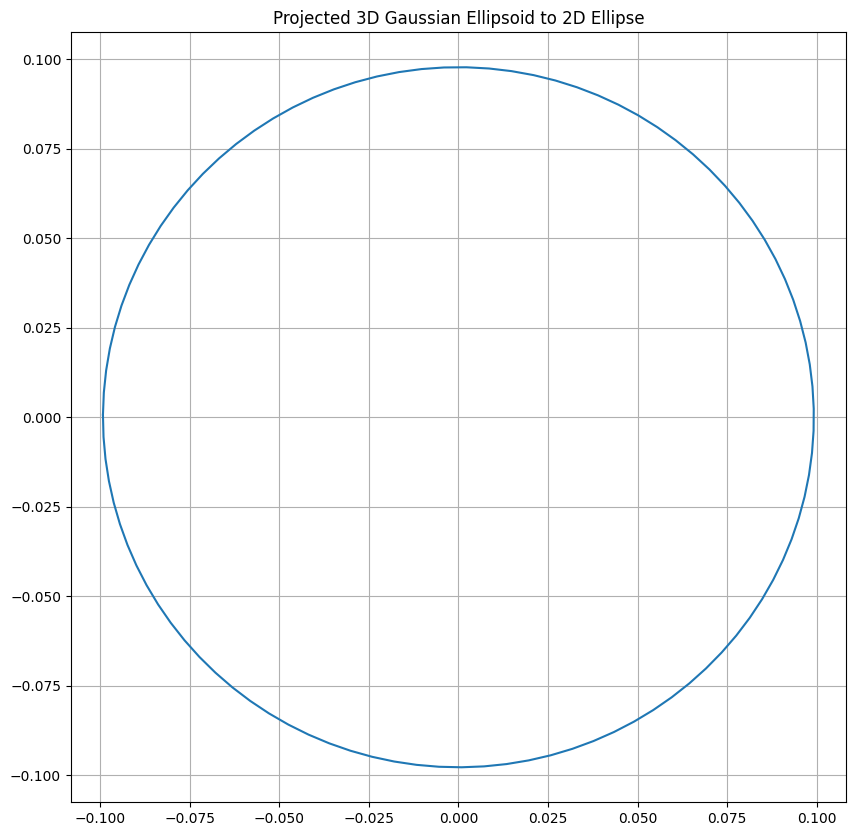

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh

def create_3d_gaussian_ellipsoid(center, axes):
    """
    Create a covariance matrix for a 3D Gaussian ellipsoid.

    :param center: Center of the ellipsoid [x, y, z]
    :param axes: Axes lengths [a, b, c]
    :return: Covariance matrix
    """
    sigma = np.diag(np.square(axes))
    return sigma

def project_gaussian(PV, center_3d, sigma_3d):
    """
    Project a 3D Gaussian through a perspective matrix.

    :param PV: 4x4 projection + view matrix
    :param center_3d: 3D center of the Gaussian
    :param sigma_3d: 3D covariance matrix of the Gaussian
    :return: 2D center, 2x2 covariance matrix in 2D
    """
    # Project center
    center_4d = np.append(center_3d, 1)
    center_clip = PV @ center_4d
    w = center_clip[3]
    center_2d = center_clip[:2] / w

    # Project covariance (simplified, real projection would involve more steps)
    sigma_v = sigma_3d  # Assuming no rotation in view matrix for simplicity
    sigma_clip = PV[:3, :3] @ sigma_v @ PV[:3, :3].T
    sigma_2d = sigma_clip[:2, :2] / (w**2)  # Approximate perspective effect

    return center_2d, sigma_2d

def ellipse_params_from_covariance(sigma_2d):
    """
    Get ellipse parameters from 2D covariance matrix.

    :param sigma_2d: 2D covariance matrix
    :return: major axis length, minor axis length, angle of rotation
    """
    eigenvalues, eigenvectors = eigh(sigma_2d)
    major = np.sqrt(eigenvalues.max())
    minor = np.sqrt(eigenvalues.min())
    angle = np.degrees(np.arctan2(eigenvectors[1, eigenvalues.argmax()], eigenvectors[0, eigenvalues.argmax()]))
    return major, minor, angle

def plot_ellipse(center, major, minor, angle):
    """
    Plot an ellipse given its parameters.

    :param center: Center of the ellipse [x, y]
    :param major: Length of major axis
    :param minor: Length of minor axis
    :param angle: Angle of rotation in degrees
    """
    theta = np.linspace(0, 2*np.pi, 100)
    ellipse = np.array([major*np.cos(theta), minor*np.sin(theta)])
    R = np.array([[np.cos(np.radians(angle)), -np.sin(np.radians(angle))],
                  [np.sin(np.radians(angle)), np.cos(np.radians(angle))]])
    ellipse_rotated = np.dot(R, ellipse)
    plt.plot(center[0] + ellipse_rotated[0], center[1] + ellipse_rotated[1])
    plt.axis('equal')
    plt.grid(True)

if __name__ == "__main__":
    # Define 3D ellipsoid parameters
    center_3d = np.array([0.0, 0.1, -0.15])  # New center in 3D space
    axes = np.array([0.2, 0.21, 0.1])  # Axes lengths a, b, c

    # Provided PV matrix
    PV = np.array([
        [0.839099, 0.000000, -0.000604, -0.000091],
        [-0.000238, 0.771070, -0.330967, -0.126752],
        [-0.000688, -0.410530, -0.956432, 1.249704],
        [-0.000661, -0.394431, -0.918925, 1.592853]
    ])

    sigma_3d = create_3d_gaussian_ellipsoid(center_3d, axes)

    center_2d, sigma_2d = project_gaussian(PV, center_3d, sigma_3d)
    major, minor, angle = ellipse_params_from_covariance(sigma_2d)

    print(f"Projected Ellipse Center: {center_2d}")
    print(f"Major axis: {major}, Minor axis: {minor}, Angle: {angle} degrees")

    # Plotting
    plt.figure(figsize=(10, 10))
    plot_ellipse(center_2d, major, minor, angle)
    plt.title("Projected 3D Gaussian Ellipsoid to 2D Ellipse")
    plt.show()